<a href="https://colab.research.google.com/github/ErYavi/Robotica_2023/blob/main/Notebooks/2.2.%20Clasificaci%C3%B3n%20de%20d%C3%ADgitos%20con%20un%20perceptr%C3%B3n%20multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div><img style="float: right; width: 120px; vertical-align:middle" src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/EU_Informatica/ETSI%20SIST_INFORM_COLOR.png" alt="ETSISI logo" />


# Clasificación de dígitos con un perceptrón multicapa<a id="top"></a>

<i><small>Autores: Alberto Díaz Álvarez y Guillermo Iglesias Hernández<br>Última actualización: 2023-10-04</small></i></div>
                                                  

***

## Introducción

La clasificación de imágenes es una de las tareas más fundamentales y desafiantes en el campo del aprendizaje automático y la visión por computador. El conjunto de datos MNIST (del inglés _Modified National Institute of Standards and Technology database_) es un gran conjunto de imágenes de dígitos manuscritos que ha servido como base para la investigación en reconocimiento de patrones y aprendizaje automático. Contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba, cada una de ellas de 28x28 píxeles en escala de grises, representando dígitos del 0 al 9.

Dada la simplicidad relativa (en comparación con imágenes más complejas) y el tamaño del conjunto de datos MNIST, es un punto de partida ideal para cualquier persona que quiera comenzar a trabajar en el mundo del aprendizaje automático y la clasificación de imágenes. A pesar de que existen modelos más avanzados como las redes neuronales convolucionales que han demostrado un rendimiento excepcional en tareas similares, en esta ocasión, nos centraremos en el uso de un perceptrón multicapa (MLP, del inglés _Multilayer Perceptron_) para la tarea de clasificación.

Un perceptrón multicapa es una red neuronal artificial _feedforward_ que consiste en al menos tres capas de nodos: una capa de entrada, una o más capas ocultas y una capa de salida. A pesar de su estructura simple en comparación con otros tipos de redes neuronales, los MLP son capaces de aprender y modelar funciones no lineales, lo que los hace adecuados para una variedad de tareas, incluida la clasificación de imágenes.

## Objetivos

Vamos a por ello. En esta práctica tenemos los siguientes objetivos:

1. **Descargar y explorar el conjunto de datos MNIST**: Antes de la creación del modelo, es esencial familiarizarnos con el conjunto de datos, entender su estructura y visualizar algunas de las imágenes contenidas en él.
2. **Preprocesamiento de datos**: Transformación los datos en un formato adecuado para alimentar el modelo, lo que incluye la normalización y la codificación _one-hot_ de las etiquetas.
3. **Construir un perceptrón multicapa**: Diseño y construcción de un MLP usando bibliotecas populares de aprendizaje profundo. Experimentar con diferentes estructuras y parámetros para encontrar un diseño óptimo.
4. **Entrenamiento del modelo**: Utilizar el conjunto de entrenamiento de MNIST para entrenar nuestro perceptrón multicapa, monitorizando su rendimiento en el conjunto de validación para evitar el sobreajuste.
5. **Evaluación del modelo**: Una vez entrenado, evaluar el rendimiento del MLP en el conjunto de prueba de MNIST para determinar su precisión y capacidad de generalización en datos no vistos.
6. **Optimización (si es necesario)**: Basándonos en los resultados, realizar ajustes en el modelo o en el proceso de entrenamiento para mejorar el rendimiento.

Al final de este notebook, esperamos tener un modelo de perceptrón multicapa que pueda clasificar con precisión los dígitos manuscritos del conjunto de datos MNIST y adquirir una comprensión sólida de los pasos involucrados en la construcción y entrenamiento de un MLP para tareas de clasificación.

## Bibliotecas y configuración

Comenzaremos instalando las bibliotecas necesarias. Esto sólo es necesario en el caso de que no tengamos el entorno ya creado.

In [1]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow

A continuación importaremos las bibliotecas que se utilizarán a lo largo del _notebook_.

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

Forzamos algunos parámetros de configuración.

In [3]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (20, 6),'figure.dpi': 64})

os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Usar CPU

***

## El conjunto de datos MNIST

MNIST es un conjunto de datos ampliamente utilizado en el campo del _machine learning_ para tareas de clasificación de imágenes. Contiene imágenes de dígitos escritos a mano, desde el $0$ hasta el $9$.

| ![Algunos de los ejemplos incluidos en el conjunto MNIST](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png) |
|:--:|
| **Figura 1**. _Algunos de los ejemplos incluidos en el conjunto MNIST_. Fuente: [Wikipedia](https://commons.wikimedia.org/wiki/File:MnistExamplesModified.png) |

Cada imagen en el conjunto de datos MNIST es de $28 \times 28$ píxeles, lo que da un total de $784$ píxeles por imagen. Cada píxel tiene un valor que varía de $0$ a $255$, indicando niveles de gris, donde $0$ es blanco (donde no hay nada escrito) y 255 es negro (donde sí hay algo escrito).

El conjunto de datos MNIST completo se divide $60.000$ imágenes para entrenamiento y $10.000$ imágenes para pruebas.

### Cargando el conjunto con Python

Para cargar el conjunto de datos, usaremos keras. En el módulo `datasets` disponemos de la función `load_data(...)` que nos facilita el acceso a unos pocos conjuntos de datos ya preparados (o casi preparados) para trabajar con ellos. Más información sobre esto disponible en la [documentación del módulo <code>datasets</code>](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Carga los conjuntos de entrenamiento (sufijo <code>train</code>) y test (sufijo <code>test</code>) en sus correspondientes variables. Los prefijos <code>x</code> e <code>y</code> se refieren a las entradas (<i>input</i>) y salidas (<i>output</code> o <i>labels</code> en el caso concreto de clasificación) del modelo.</div>

In [28]:
# CARGA EL CONJUNTO DE DATOS EN SUS RESPECTIVAS VARIABLES
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

Vamos a comprobar las dimensiones de los conjuntos de datos cargados.

In [30]:
print(f'Dimensiones entrenamiento: {x_train.shape} input, {y_train.shape} output')
print(f'Dimensiones test:          {x_test.shape} input, {y_test.shape} output')

Dimensiones entrenamiento: (60000, 28, 28) input, (60000,) output


Vemos que, efectivamente, el conjunto de datos se divide en un conjunto de datos de entrenamiento de $60000$ ejemplos y un conjunto de test de $10000$ ejemplos. El primero es con el que entrenaremos nuestro modelo mientras que el segundo servirá para evaluar el desempeño del modelo con datos que no ha visto nunca.

### Preprocesamiento de los datos

Veamos qué contiene un ejemplo concreto, por ejemplo el que ocupa la posición 42:

In [31]:
print(x_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 25

Cada uno de los ejemplos es una matriz de $28 \times 28$ valores numéricos que van del $0$ al $255$. Como dijimos anteriormente, esto representa la intensidad del trazo de nada (un valor de $0$) a todo (un valor de $1$).

Vamos a crear una función para imprimir algunos ejemplos. No os preocupéis por la implementación, lo importante es que los muestre por pantalla.

In [32]:
def show_examples(X, y=None, ŷ=None):
    fig, ax = plt.subplots(1, 5, figsize=[25, 5])

    for i, img in enumerate(X[:5]):
        title = None
        if y is not None:
            title = f'$y = {y[i]}$'
        if ŷ is not None:
            title += f'\n$ŷ = {ŷ[i]}$'
        if title:
            ax[i].set_title(title)
        cmap = 'gist_gray'
        if y is not None and ŷ is not None and not np.allclose(y[i], ŷ[i]):
            cmap = 'gist_heat'
        ax[i].imshow(img, cmap=cmap)
    plt.show()

Ahora veamos qué forma tienen estos arrays de $28 \times 28$.

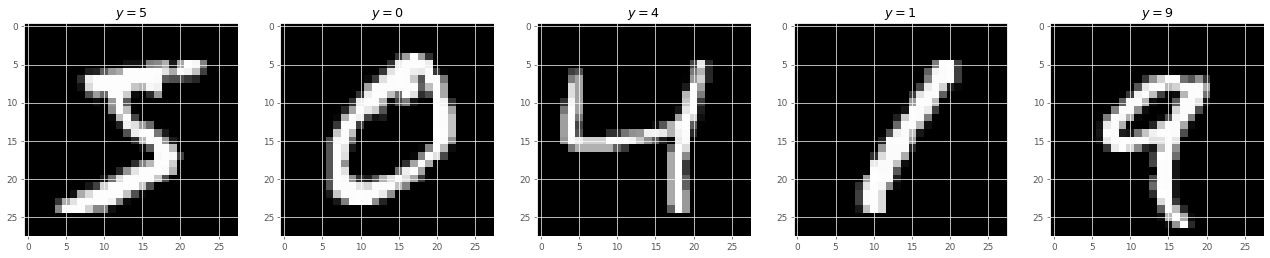

In [33]:
show_examples(x_train, y_train)

Cuando trabajamos con redes neuronales, lo más común es trabajar con entradas que están normalizadas al intervalo $[0, 1]$, así que vamos a pasar los valores de todos los ejemplos a dicho intervalo.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Normaliza todos los valores de los ejemplos de entrenamiento (<code>x_train</code>) y test (<code>x_test</code>) al intervalo $[0, 1]$.</div>

In [34]:
# NORMALIZA LOS CONJUNTOS DE DATOS
x_train = x_train/255
x_test = x_test/255

Si todo ha sido correcto, los valores del siguiente ejemplo deberían estar entre $0$ y $1$.

In [35]:
print(x_train[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Ahora bien, al estar normalizados, las diferencias relativas entre valores serán las mismas, por lo que el mapa de calor no habrá variado:

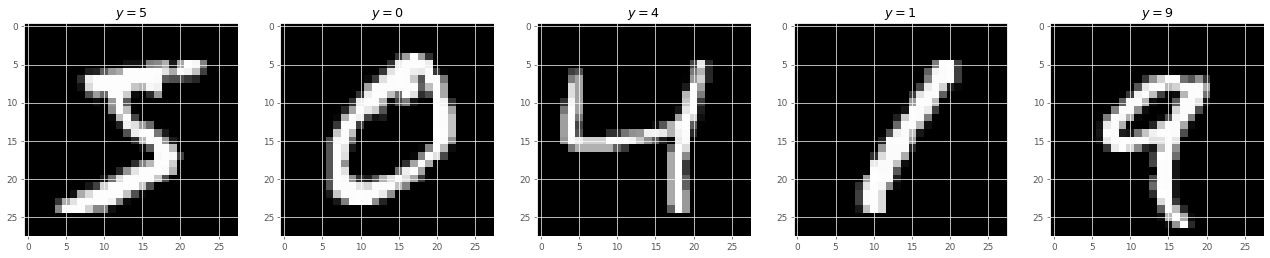

In [36]:
show_examples(x_train, y_train)

Con la entrada preprocesada, nos toca preprocesar los valores de la salida de nuestro conjunto. En realidad, no es necesario por las abstracciones de las que disponemos en `keras`, pero por el momento vamos a obviarlas y a entender qué tenermos que hacer y por qué.

Comencemos por ver cuál es el valor esperado del ejemplo 42. Viendo la imagen, no tengo muy claro si es un 1 o un 7, así que salgamos de dudas.

In [37]:
print(y_train[42])

7


Ahora lo que vamos a tratar es un problema relacionado con la **clasificación multiclase**. En el momento que trabajamos con dos clases, tener una neurona de salida que nos discrimina entre los dos tiene sentido. Supongamos que estamos con un problema para identificar si una foto se corresponde o no a un gato. Si usamos una neurona de salida con activación sigmoidal, cuanto más se acerque al 0 o al 1, más se alejará del 1 o del 0, o dicho de otro modo, cuando más seguros estemos de que es un gato, más seguros estaremos de que no es un no-gato.

Bueno, supongamos que queremos indicar si en una foto hay un gato, un perro o un oso. Con una neurona ¿qué hacemos? ¿Asignamos intervalos? Y recordemos que las redes funcionan con un proceso denominado descenso del gradiente que trabaja con pequeños incrementos de error. Al tener un rango de valores reales del 0 al 1, tenemos un orden entre estos valores. ¿Cómo colocamos los intervalos? ¿Es oso entre medias? ¿Es el oso una mezcla entre perro y gato? ¿Como vamos del perro al gato si el descenso del gradiente nos va a alejar del oso porque el error va a ser muy alto?

La solución (una de ellas, en realidad hay varias) es usar lo que se conoce como la codificación _one hot_; esto consiste en pasar del valor numérico a un vector binario que represente el mismo valor, de la siguiente manera:

```python
0 = [1,0,0,0,0,0,0,0,0,0]
1 = [0,1,0,0,0,0,0,0,0,0]
2 = [0,0,1,0,0,0,0,0,0,0]
...
9 = [0,0,0,0,0,0,0,0,0,1]
```
  
Y para ello, entre las utilidades de `keras` existe una herramienta que convierte los valores numéricos a categóricos, realizando una codificación _one hot_. Se trata de la función `to_categorical` (más información en [su documentación](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)).

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Realiza una codificación <i>one hot</i> de todos los valores de salida esperados para los conjuntos de entrenamiento (<code>y_train</code>) y test (<code>y_test</code>).</a>.</div>

In [38]:
# CODIFICA EN ONE HOT LAS ETIQUETAS DE LOS CONJUNTOS DE ENTRENAMIENTO Y TEST
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Tras la ejecución, cada uno de los ejemplos estará codificado de forma distinta. Ahora sí, tendremos una salida para cada clase y sólo estará activa aquella clase que represente el ejemplo:

In [39]:
print(y_train[42])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


En definitiva, esta codificación nos convierte el valor numérico en un array ordenado donde se activa la neurona que se corresponde con la respuesta. De esta manera ya tenemos un valor de salida que podremos comparar con la salida de nuestra red, que será de $10$ neuronas ($10$ números a clasificar. Y ahora sí, ya tenemos nuestros datos preparados.

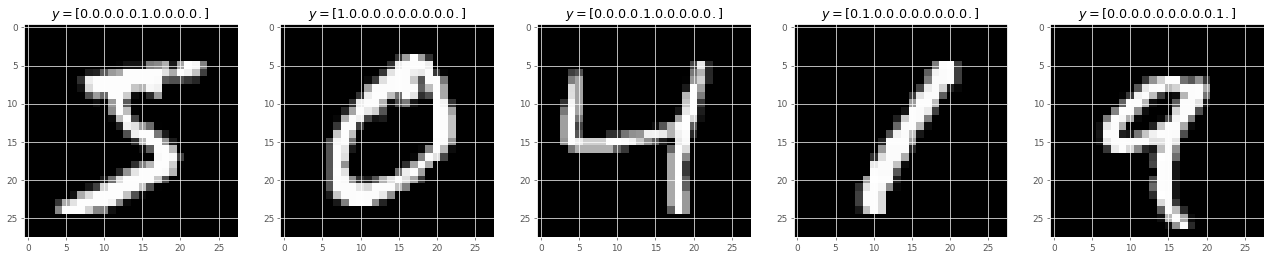

In [40]:
show_examples(x_train, y_train)

## Modelo de predicción

Vamos a crear un modelo sencillo de perceptrón multicapa con `keras`. Para ello usaremos lo que se conoce como **API funcional**, la forma más potente que posee keras de definir modelos.

El modelo se representa como un grafo por donde fluye la la información, desde un nodo `input` hasta un nodo `output`. Esto se declara a través del modelo `Model` (más información en la [documentación de `Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)) especificando quienes son estos dos extremos del grado:

```python
model = Model(input, output)
```

Ahora queda definir quiénes son `input` y `output`. Cada uno de los nodos que componen este grafo (también se les denomina _capa_ cuando hablamos en el contexto de las redes neuronales) son operaciones de algún tipo sobre la información que les llega. El primer nodo es, generalmente, la capa denominada `Input` (más información en [su documentación](https://www.tensorflow.org/api_docs/python/tf/keras/Input)). Esta capa se tiene que definir con el tamaño que tendrá cada uno de los ejemplos de entrada de nuestro modelo. Por ejemplo, en nuestro caso, sería lo siguiente:

```python
input = Input(shape=(28, 28))
```

Tras esto, hemos creado una capa de entrada donde se recibirán los ejemplos y _fluirán_ a través del grafo. El resto será una sucesión de nodos que tendrán la siguiente forma:

```python
x2 = Nodo(configuración_de_nodo)(x1)
x3 = Nodo(configuración_de_nodo)(x2)
...
output = Nodo(configuración_de_nodo)(xn)
```

¿Qué nodos usaremos nosotros? Bueno, en el caso del perceptrón multicapa, usaremos los siguientes dos nodos:

* `Flatten`: Transforma la imagen en un vector para que pueda ser procesado por la primera capa del perceptrón. Más información en la documentación de [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).
* `Dense`: Toma un vector (en realidad matriz, pero pensemos por ahora vector) y realiza la operación de infrenecia de una capa de neuronas. Esto es, multiplica cada entrada por su peso, las suma y al valor resultante le aplica la función de activación. En su construcción toma un parámetro obligatorio (el número de neuronas de la capa) y uno opcional (la función de activación a aplicar en la capa). Más información en la documentación de [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Completa la función <code>create_model</code> para que devuelva un perceptrón multicapa donde se aplane la entrada, pase por una capa densa de 16 neuronas con función de activación ReLU y una capa de salida con tantas neuronas como ejemplos queremos clasificar con función de activación <i>softmax</i>.</div>

In [41]:
# CONSTRUYE EL MODELO
def create_model():
    input = tf.keras.layers.Input(shape=(28, 28))
    x1=tf.keras.layers.Flatten()(input)
    x2=tf.keras.layers.Dense(16, activation='relu')(x1)
    output = tf.keras.layers.Dense(10, activation='softmax')(x2)
    model = tf.keras.Model(inputs=input, outputs=output)
    return model

Ahora cada vez que llamemos a la función crearemos un nuevo modelo con los pesos inicializados aleatoriamente. Si llamamos al método `summary` de dicho modelo podremos ver los detalles del mismo.

In [42]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Como hemos dicho, el modelo está creado con los pesos inicializados aleatoriamente. Por tanto, si nosotros inferimos un valor, nos va a predecir cualquier cosa.

In [43]:
ŷ_train = model.predict(x_train)
print(f'Esperado: {np.argmax(y_train[42])} -> ({y_train[42]})')
print(f'Predicho: {np.argmax(ŷ_train[42])} -> ({ŷ_train[42]})')

1875/1875 [==============================] - 2s 1ms/step
Esperado: 7 -> ([0. 0. 0. 0. 0. 0. 0. 1. 0. 0.])
Predicho: 3 -> ([0.06157437 0.10173691 0.09927484 0.158618   0.09996955 0.0892704
 0.10633598 0.06165435 0.13445193 0.08711363])


Lo que tendremos que hacer es **entrenar** al modelo para que aprenda a predecir bien las salidas en función de las entradas. Esto es un esquema supervisado de aprendizaje, donde continuamente vamos a ir ajustando (_fit_) los pesos con un algoritmo de optimización, usando el error de salida (_loss_), de tal manera que este último vaya disminuyendo. Por tanto, necesitaremos:

* Función de _loss_: Quien nos calcula el error cometido
* Optimizador: El algoritmo que hace la retropropagación del gradiente para decidir cómo tienen que cambiar los pesos de la red

Estos dos elementos se especifican a través del método `compile` de model.

In [44]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

La explicación de por qué usamos `categorical_crossentropy` es un tanto larga, y es preferible explicarla en clase. El optimizador da un poco igual y, en este caso, hemos usado el SGD (del inglés _Stochastic Gradient Descent_) que es una variación del descenso del gradiente clásico que conocemos.

Por cierto, el parámetro opcional `metrics` sirve para añadir cálculos para medir el desempeño de nuestro modelo. No es algo que use internamente el modelo, sino que es algo para que a nosotros, pobres humanos, nos de información de cómo está evolucionando el proceso de forma que lo entendamos.

¡Y ya estaría! Ya tenemos nuestro modelo creado, con la información además de cómo va a aprender cuando lo ajustemos. Este ajuste es el proceso de entrenamiento.

### Entrenamiento del modelo

Como hemos dicho antes, entrenar es ajustar (_fit_) los pesos de nuestro modelo. De ello se encarga, precisamente, el método `fit`. Este tomará un conjunto de entrada (en nuestro caso las entradas de nuestro conjunto de entrenamiento `x_train`), un conjunto esperado de salida (en nuestro caso las salidas de nuestro conjunto de entrenamiento `y_train`) y un montón de parámetros opcionales para variar el comportamiento del entrenamiento, las cuales podemos explorar en la [documentación de `Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). Como salida, nos dará un objeto con el histórico del entrenamiento, que consistirá en un montón de valores obtenidos en cada iteración (_epoch_) del entrenamiento.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Entrena el modelo que hemos creado durante $10$ <i>epochs</i>, con un tamaño de <i>batch</i> de $16$ ejemplos y usando como conjunto de validación una partición aleatoria del 20% de los ejemplos del conjunto de entrenamiento.</div>

In [ ]:
# ENTRENA EL MODELO
history =

Veamos cómo ha progresado el entrenamiento.

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch num.')
plt.show()

De los resultados del último _epoch_ de entrenamiento junto con la evolución del mismo podemos sacar bastantes conclusiones, como por ejemplo:

- ¿Parece que el _loss_ converge? Si la pendiente de bajada del conjunto de entrenamiento disminuye con el tiempo y se estabiliza, esto puede indicar que el modelo está convergiendo y aprendiendo de los datos. ¿No converge, pero oscila? Quizá sea útil ajustar el factor de aprendizaje; eso sí, cuidado, porque cuando es muy alta puede hacer que el entrenamiento oscile o diverja, mientras que si es muy baja puede hacer que el entrenamiento sea muy lento o converja en mínimos locales.
- ¿Hay evidencias de sobreajuste (_overfitting_) o de subajuste (_underfitting_)? Porque si hay evidencia de sobreajuste, podría ser útil incorporar técnicas de regularización como _dropout_, regularización L1/L2 o, simplemente, aumenter el número de ejemplos. O lo mismo hay evidencias de subajuste y necesitamos aumentar la complejidad del modelo.
- Si el la pérdida oscila o no converge, puede ser útil ajustar la tasa de aprendizaje. Una tasa muy alta puede hacer que el entrenamiento oscile o diverja, mientras que una tasa muy baja puede hacer que el entrenamiento sea muy lento.

### Evaluación del modelo

Una vez tenemos un modelos que funciona como queremos, debemos proceder a evaluarlo. Para esto es el conjunto de test (en nuestro caso  `x_test` e `y_test`). Este conjunto nunca ha sido visto por el modelo y es de esperar que se comporte de forma muy parecida a cómo se comportaría en el mundo real. Para ello haremos uso del método `evaluate` del modelo (más información en la [documentación de `Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)), que tomará dicho conjunto y evaluará el resultado comparando la salida que da la red para `x_test` contra la esperada `y_test`.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Evalúa el conjunto modelo contra el conjunto de datos de test.</div>

In [ ]:
# EVALUA EL MODELO
loss, acc =
print(f'Loss: {loss}; Exactitud: {acc}')

Los valores son una lista compuesta del _loss_ más las métricas que hemos dado de alta en la compilación del modelo. De aquí podemos extraer la conclusión de si el modelo es suficientemente apto para poner o no en producción.

Veamos qué tal clasifica algunos de los ejemplos del conjunto de test, aunque ya vemos que bastante bien.

In [ ]:
ŷ_test = model.predict(x_test).argmax(axis=-1)

show_examples(x_test, y_test.argmax(axis=-1), ŷ_test)

Impecable. Ahora vamos a ver qué pasaría con un modelo demasiado grande y el efecto que la regularización puede tener en este tipo de entrenamientos.

## Regularización en modelos

La regularización es una técnica utilizada en el aprendizaje automático para prevenir el sobreajuste (overfitting) en los modelos. El sobreajuste ocurre cuando un modelo se adapta demasiado a los datos de entrenamiento, lo que resulta en un rendimiento deficiente en los datos no vistos o de prueba. Es decir, en lugar de aprender relaciones generales entre las características y las etiquetas, el modelo aprende ruidos y detalles específicos de los datos de entrenamiento.

### ¿Cuándo se necesita regularización?

La necesidad de regularización se hace evidente cuando:

1. El modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento que en el conjunto de prueba. Es una señal de que el modelo podría estar capturando ruido en lugar de relaciones generales.
2. El modelo es complejo con muchos parámetros. Los modelos con alta capacidad (como las redes neuronales profundas) tienden a sobreajustar más fácilmente si no tienen suficientes datos para entrenar.

### Ejemplo de modelo sobredimensionado

Supongamos que hemos creado un modelo de perceptrón multicapa con varias capas y muchos nodos en cada capa. Entrenamos este modelo con nuestros datos MNIST y obtenemos un rendimiento casi perfecto en el conjunto de entrenamiento. Sin embargo, comprobamos que el conjunto de validación no converge de la misma manera.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Completa la función <code>create_model</code> para crear un modelo dimensionado compuesto de tres capas ocultas de $512$ neuronas cada una con función de activación ReLU, y una capa de salida con tantos ejemplos como clases queremos clasificar con función de activación <i>softmax</i>.</div>

In [ ]:
# CONSTRUYE EL MODELO
def create_model():
    return

Veamos qué parámetros tiene nuestro modelo.

In [ ]:
model = create_model()
model.summary()

Vaya, este ya es grandecito. Muy bien, ahora compilaremos el modelo de la misma forma que hicimos antes.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Compila el modelo para que use como optimizador el descenso del gradiente estocástico (SGD), como función de pérdida la entropía cruzada y como métricas únicamente la exacitud (<i>accuracy</i>).</div>

In [ ]:
# COMPILA EL MODELO

Con nuestro modelo preparado, podemos ejecutar el entrenamiento a ver qué tal se comporta.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Entrena el modelo que hemos creado durante $10$ <i>epochs</i>, con un tamaño de <i>batch</i> de $16$ ejemplos y usando como conjunto de validación una partición aleatoria del 20% de los ejemplos del conjunto de entrenamiento.</div>

In [ ]:
# ENTRENA EL MODELO
history =

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch num.')
plt.show()

Si sale como es de esperar (después de todo trabajamos con valores aleatorios y puede dar la casualidad de que entrena muy bien), se podrá intuir que el modelo se está sobreespecializando. Mientras que la exactitud del modelo (_accuracy_) se acerca al $100%$ para el conjunto de entrenamiento, se aleja en el conjunto de validación. También se puede observar mejor vieno la evolución del _loss_; mientras que en el caso del conjunto de entrenamiento está convergiendo casi a 0, en el del conjunto de validación está separándose y aumentando.

In [ ]:
ŷ_test = model.predict(x_test).argmax(axis=-1)

show_examples(x_test, y_test.argmax(axis=-1), ŷ_test)

Es probable que en este caso acierte. Después de todo, las imágenes de MNIST son muy parecidas entre si. Sin embargo en problemas más complejos como el de [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html), donde la entrada es bastante más compleja, es común que se sobrespecialice demasiado.

### Aplicando Dropout para Regularización

_Dropout_ es una técnica de regularización específica para redes neuronales. Durante el entrenamiento, dropout "desactiva" aleatoriamente una proporción de nodos en la capa, lo que evita que ciertos nodos se especialicen demasiado.

| ![Ilustración de cómo funciona la técnica de regularización dropout](https://www.oreilly.com/api/v2/epubs/9781786469878/files/assets/e6350249-1c35-407e-8c89-534c16b38d3b.png) |
|:--:|
| **Figura 2**. _Ilustración de cómo funciona la técnica de regularización dropout_. Fuente: [Machine Learning for Developers](https://www.oreilly.com/library/view/machine-learning-for/9781786469878/) de Rodolfo Bonnin |

Vamos a modificar nuestro modelo anterior para incluir _dropout_. Podemos encontrar toda la información necesaria sobre cómo usar esta capa en la [documentación de la capa `Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Completa la función <code>create_model</code> para crear un modelo similar al anterior, pero que tras cada capa densa de $512$ neuronas haya una capa de dropout que desactive el $50%$ de las neuronas en cada epoch de entrenamiento.</div>

In [ ]:
# CONSTRUYE EL MODELO
def create_model():
    return

Veamos qué parámetros tiene nuestro modelo.

In [ ]:
model = create_model()
model.summary()

Exactamente los mismos, ya que el _dropout_ no añade ningún parámetro más a ajustar. Fantástico. Procedamos ahora a compilar el modelo tal y como lo hemos hecho antes.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Compila el modelo para que use como optimizador el descenso del gradiente estocástico (SGD), como función de pérdida la entropía cruzada y como métricas únicamente la exacitud (<i>accuracy</i>).</div>

In [ ]:
# COMPILA EL MODELO

Ahora, a entrenar el modelo. Es de esperar que el entrenamiento sea más lento. Al fin y al cabo, al haber indicado que hay un $50\%$ de neuronas no actualizan sus pesos en cada _epoch_, en promedio se necesitará el doble de _epochs_ para que todos los pesos se actualicen el mismo número de veces. Sin embargo, tenemos la ventaja de que el conocimiento adquirido a la larga se reparte por todos los pesos de la red, en luugar de quedarse concentrado en unos pocos.

<div style="padding:.5rem;color:white;background-color:#3c6478"><b>Ejercicio</b>. Entrena el modelo que hemos creado, esta vez durante $20$ <i>epochs</i>, con un tamaño de <i>batch</i> de $16$ ejemplos y usando como conjunto de validación una partición aleatoria del 20% de los ejemplos del conjunto de entrenamiento.</div>

In [ ]:
# ENTRENA EL MODELO
history =

A la vista de los números, parece que lo ha hecho mejor. Veamos cómo ha evolucionado en una gráfica, que es más cómodo de seguir.

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epoch num.')
plt.show()

Podemos observar que la evolución ha sido mucho mejor que en el caso anterior. Ahora bien, no deja de ser un parámetro más con el que experimentar, por lo que el proceso de búsqueda de una arquitectura se complica un poco más.

## Conclusiones

A lo largo de este _notebook_ hemos abordado varios conceptos y técnicas cruciales en el ámbito del aprendizaje profundo y la clasificación de imágenes. Algunas de las conclusiones clave que podemos extraer de aquí son las siguientes:

1. **MNIST como inicio para la visión robótica**: Si bien el conjunto de datos MNIST es una introducción básica a la clasificación de imágenes, sienta las bases para técnicas más avanzadas de visión robótica. La percepción en robótica no se limita a identificar dígitos, sino que se expande a la detección de objetos, seguimiento, navegación y mucho más.
1. **Importancia del diseño adecuado del modelo**: Hemos visto que no basta con agregar capas y nodos a una red neuronal esperando mejorar automáticamente el rendimiento. Un modelo sobredimensionado puede adaptarse demasiado a los datos de entrenamiento, lo que lleva a un sobreajuste y una pobre generalización en datos no vistos. Por tanto, es esencial considerar la complejidad del modelo en función del tamaño y la naturaleza del conjunto de datos.
1. **Regularización con Dropout**: El Dropout emerge como una herramienta poderosa para combatir el sobreajuste en redes neuronales. Al desactivar aleatoriamente nodos durante el entrenamiento, esta técnica evita que la red se vuelva demasiado dependiente de cualquier nodo o característica específica, promoviendo la robustez y la generalización. Sin embargo, el grado de Dropout (la proporción de nodos desactivados) es un hiperparámetro que debe ajustarse adecuadamente, ya que un valor excesivo puede llevar a un entrenamiento ineficiente y una generalización insuficiente.
1. **Iteración en entornos dinámicos**: En robótica, los modelos de percepción deben ser probados y ajustados en ambientes dinámicos y a menudo impredecibles. Esto significa que es crucial iterar y experimentar con el modelo en situaciones del mundo real, y no solo confiar en conjuntos de datos estáticos.
1. **Exploraciones futuras en percepción robótica**: Aunque hemos sentado las bases para la percepción usando perceptrones multicapa, hay muchas técnicas y arquitecturas avanzadas específicas para la robótica, como las redes neuronales convolucionales (CNN) para la visión por computadora o las redes recurrentes (RNN) para secuencias temporales, que son esenciales para tareas como la navegación y la planificación de trayectorias.

***

<div><img style="float: right; width: 120px; vertical-align:top" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" alt="Creative Commons by-nc-sa logo" />

[Volver al inicio](#top)

</div>